  label                                            message  label_num
0   ham  Go until jurong point, crazy.. Available only ...          0
1   ham                      Ok lar... Joking wif u oni...          0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...          1
3   ham  U dun say so early hor... U c already then say...          0
4   ham  Nah I don't think he goes to usf, he lives aro...          0
Number of samples before dropping NaN: 5572
Number of samples after dropping NaN: 5572
Accuracy: 98.74%
Classification Report:
              precision    recall  f1-score   support

         Ham       0.99      1.00      0.99       966
        Spam       0.99      0.92      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



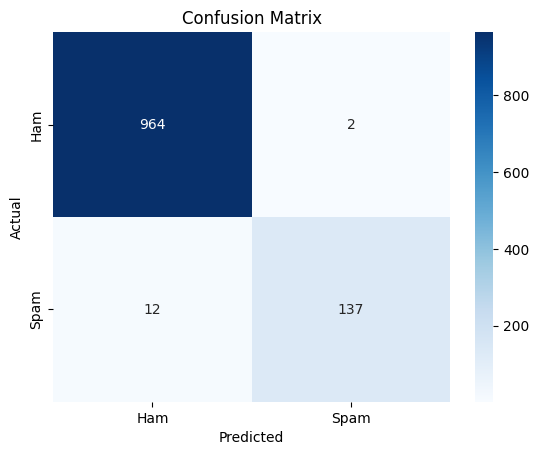

Accuracy: 98.74%
Classification Report:
              precision    recall  f1-score   support

         Ham       0.99      1.00      0.99       966
        Spam       0.99      0.92      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



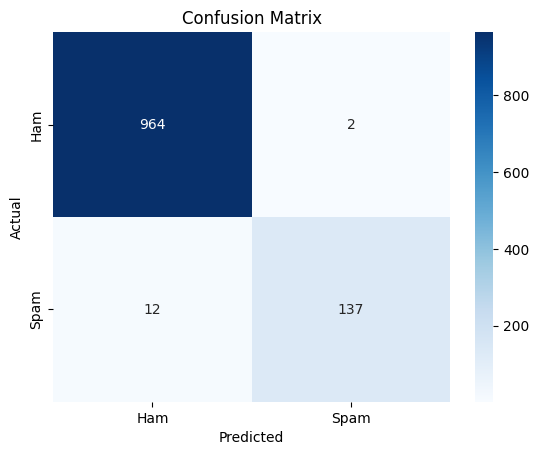

In [2]:
from IPython import get_ipython
from IPython.display import display
# %%
!pip install -q scikit-learn pandas matplotlib seaborn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

url = "/content/spamhamdata.csv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

df['label_num'] = df.label.map({'ham': 0, 'spam': 1})

print(df.head())
# Check the number of samples after dropping NaN
print(f"Number of samples before dropping NaN: {len(df)}")

# Drop rows with missing values in the 'label_num' column
df.dropna(subset=['label_num'], inplace=True)

print(f"Number of samples after dropping NaN: {len(df)}")


if len(df) <= 1:
    print("Error: Not enough samples to perform train_test_split after dropping NaN. Please provide a dataset with more than one sample.")
else:
    # Proceed with train_test_split only if there are enough samples
    X = df['message']
    y = df['label_num']

    # Check if there are at least two distinct classes in y for stratification
    if y.nunique() < 2:
         print("Error: Not enough distinct classes in 'label_num' for stratification. Please provide a dataset with at least two distinct label values.")
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

        # Vectorize the text data
        vectorizer = CountVectorizer()
        X_train_vec = vectorizer.fit_transform(X_train)
        X_test_vec = vectorizer.transform(X_test)

        model = MultinomialNB()
        model.fit(X_train_vec, y_train)

        y_pred = model.predict(X_test_vec)

        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy * 100:.2f}%")

        print("Classification Report:")
        # Ensure target_names and labels match the data
        print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam'], labels=[0, 1]))

        conf_matrix = confusion_matrix(y_test, y_pred)
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()

        # Moved the prediction and evaluation code from the second cell here
        # to ensure X_test_vec is defined when used.
        y_pred = model.predict(X_test_vec)

        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy * 100:.2f}%")

        print("Classification Report:")
        # Ensure target_names and labels match the data
        print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam'], labels=[0, 1]))

        conf_matrix = confusion_matrix(y_test, y_pred)
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()